In [1]:
!pip install wordcloud matplotlib Pillow nltk

In [3]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image # 이미지 처리를 위한 라이브러리
import numpy as np # 이미지를 배열로 다루기 위해

In [4]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:

long_text_en = """
Natural Language Processing (NLP) is a fascinating field at the intersection of computer science,
artificial intelligence, and linguistics. It focuses on enabling computers to understand,
interpret, and generate human language in a valuable way. This mission specifically aims
to introduce fundamental concepts and practical skills in NLP, starting with essential text
preprocessing techniques... (중략: NLP 미션에서 사용한 긴 텍스트)
...Good luck on your NLP adventures!
"""

# 1-1. 전처리 함수 (정규식, 소문자화, 토큰화, 불용어, 어간 추출)
stemmer = PorterStemmer()
stop_words_en = set(stopwords.words('english'))

def preprocess_text(text):
  text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
  text = re.sub(r'\s+', ' ', text).strip()
  tokens = word_tokenize(text)
  clean_tokens = [stemmer.stem(w) for w in tokens if w not in stop_words_en and len(w) > 1]
  return " ".join(clean_tokens)

# 1-2. 전처리 실행
text_for_wc = preprocess_text(long_text_en)
print("--- 1. 전처리 완료 (워드클라우드용 텍스트 준비) ---")


--- 1. 전처리 완료 (워드클라우드용 텍스트 준비) ---


--- 3-2. WordCloud가 사용할 최종 마스크 (배경=0, 새=255) ---


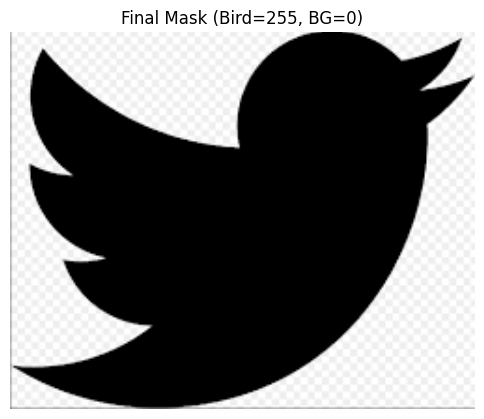


--- 4. 마스킹된 영어 워드클라우드 시각화 (최종) ---


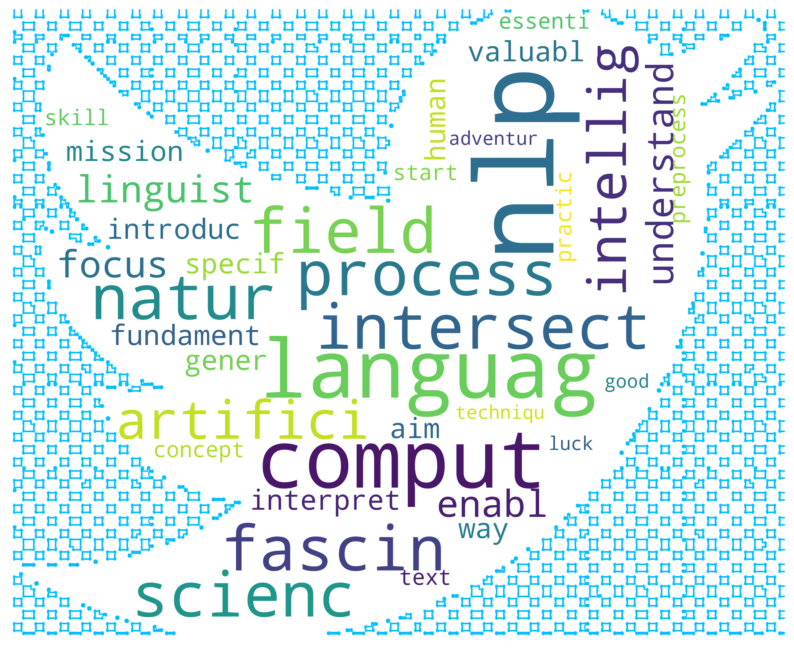

In [7]:
try:
  mask_path = 'wordcloud_twitter.png' # <- 올리신 파일 이름

  # 1. 이미지를 회색조('L')로 변환 (알파 채널 -> 0/255)
  img_gray = Image.open(mask_path).convert('L')
  mask = np.array(img_gray)

  # [시각화 1: WordCloud가 사용할 최종 마스크 확인]
  # (예상: 배경=검은색(0), 새=흰색(255))
  print("--- 3-2. WordCloud가 사용할 최종 마스크 (배경=0, 새=255) ---")
  plt.figure(figsize=(6, 6))
  plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
  plt.title("Final Mask (Bird=255, BG=0)")
  plt.axis('off')
  plt.show() #

  # --- 2. [핵심] 반전 코드(mask_inverted) 삭제! ---
  # (mask_inverted = 255 - mask 줄을 삭제함)

  # 3-3. WordCloud 객체 생성 (반전되지 않은 mask 사용)
  wordcloud_masked = WordCloud(
    background_color='white',
    scale=10, # 캔버스 확대
    mask=mask, # <- 반전되지 않은 원본 마스크 적용!
    contour_width=3,
    contour_color='deepskyblue'
  ).generate(text_for_wc)

  print("\n--- 4. 마스킹된 영어 워드클라우드 시각화 (최종) ---")
  plt.figure(figsize=(10, 10))
  plt.imshow(wordcloud_masked, interpolation='bilinear')
  plt.axis('off')
  plt.show() #

except FileNotFoundError:
  print(f"\n오류: 마스크 이미지 파일 '{mask_path}'을(를) 찾을 수 없습니다.")